In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#   Import cleaned dataset into a DataFrame

In [11]:
df = pd.read_csv('../data/dataset.csv')
df.head()

,Pregnancy,Plasma,BloodPressure,Skin,Test,BMI,DBF,Age,Result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
target = df['Result']
target

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Result, Length: 768, dtype: int64

# Cheching for NaN values

In [13]:
df.isna().sum()

Pregnancy        0
Plasma           0
BloodPressure    0
Skin             0
Test             0
BMI              0
DBF              0
Age              0
Result           0
dtype: int64

# Removing Basic Outliers
## 1) Using quantile function
## 2) Using Some own Domain Knowlegde
       for eg:- pregnancies not greater than 10 , BMI not more than 40 , etc.

In [14]:
min_preg_thres , max_preg_thres = df.Pregnancy.quantile([0.01 , 0.999])
min_preg_thres , max_preg_thres

(0.0, 15.466000000000122)

In [15]:
min_bmi_thres , max_bmi_thres = df.BMI.quantile([0.01 , 0.999])
min_bmi_thres , max_bmi_thres

(0.0, 61.19410000000047)

In [16]:
new_df = df[(df.Pregnancy >= min_preg_thres) & (df.Pregnancy < max_preg_thres) & (df.BMI > min_bmi_thres) & (df.BMI < max_bmi_thres)]
new_df

,Pregnancy,Plasma,BloodPressure,Skin,Test,BMI,DBF,Age,Result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
new_df.describe()

,Pregnancy,Plasma,BloodPressure,Skin,Test,BMI,DBF,Age,Result
count,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000
mean,3.831788,121.070199,69.634437,20.713907,80.732450,32.400397,0.472184,33.272848,0.349669
std,3.337282,32.066354,18.248328,15.885958,115.844002,6.811257,0.329624,11.699588,0.477181
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,129.500000,36.600000,0.626500,41.000000,1.000000
max,15.000000,199.000000,122.000000,99.000000,846.000000,59.400000,2.420000,81.000000,1.000000


In [18]:
preg_df = new_df[new_df.Pregnancy > 10]
preg_df.head(2)

,Pregnancy,Plasma,BloodPressure,Skin,Test,BMI,DBF,Age,Result
24,11,143,94,33,146,36.6,0.254,51,1
28,13,145,82,19,110,22.2,0.245,57,0


In [19]:
preg_df.shape

(33, 9)

In [20]:
Bmi_df = new_df[new_df.BMI >40]
Bmi_df.shape

(94, 9)

In [21]:
new_df2 = new_df[(new_df.Pregnancy < 10) & (new_df.BMI < 40)]
new_df2.sample(5)

,Pregnancy,Plasma,BloodPressure,Skin,Test,BMI,DBF,Age,Result
447,0,95,80,45,92,36.5,0.330,26,0
80,3,113,44,13,0,22.4,0.140,22,0
711,5,126,78,27,22,29.6,0.439,40,0
176,6,85,78,0,0,31.2,0.382,42,0
148,5,147,78,0,0,33.7,0.218,65,0


In [22]:
new_df2.shape

(613, 9)

In [23]:
new_df2.describe()

,Pregnancy,Plasma,BloodPressure,Skin,Test,BMI,DBF,Age,Result
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,3.389886,119.084829,68.628059,19.619902,77.897227,30.546819,0.452809,32.672104,0.311582
std,2.631452,31.730730,17.339799,14.936381,112.211857,5.176456,0.302312,11.811087,0.463518
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.500000,0.240000,24.000000,0.000000
50%,3.000000,114.000000,70.000000,22.000000,37.000000,30.800000,0.365000,28.000000,0.000000
75%,5.000000,137.000000,78.000000,31.000000,125.000000,34.500000,0.600000,39.000000,1.000000
max,9.000000,197.000000,122.000000,99.000000,846.000000,39.900000,2.329000,81.000000,1.000000


# Creating Target variable to store Result 

In [24]:
target = new_df2['Result']
target

0      1
1      0
2      1
3      0
5      0
      ..
762    0
764    0
765    0
766    1
767    0
Name: Result, Length: 613, dtype: int64

In [25]:
new_df2.shape

(613, 9)

# Creating new DataFrame by droping Result column so that we can use it for training.

In [26]:
new_df3 = new_df2.drop('Result', axis = 1)
new_df3

,Pregnancy,Plasma,BloodPressure,Skin,Test,BMI,DBF,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [27]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(new_df3)
# X_scaled[:3]

# Dividing the dataset into train and test set into 9:1 ratio

In [40]:
from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( new_df3, target, test_size = 0.1 ,random_state=10)

In [41]:
len(X_train)

551

In [42]:
len(X_test)

62

# Using RandomForestClassifier for training 

In [43]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 1670)

In [44]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1670)

# Accuracy we got on test dataset is around 82 %

In [45]:
model.score(X_test,y_test)

0.8225806451612904

# Importing the model  using joblib so that we can use it for predictions

In [46]:
# import joblib
# joblib.dump(model , 'model_joblib')

# Confusion matrix for Data Visualization

In [56]:
y_predicted = model.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[36,  2],
       [ 9, 15]], dtype=int64)

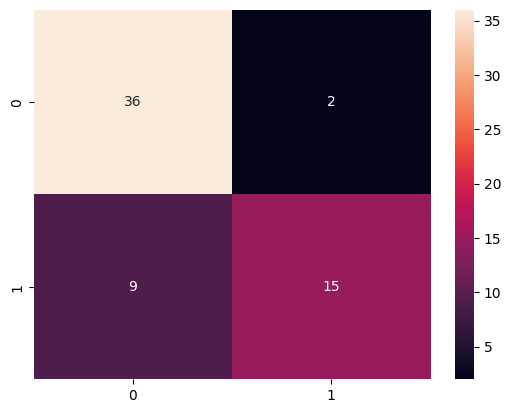

In [58]:
hm = sns.heatmap(data=cm, 
                annot=True) 
plt.show()